# Introduction to Python

Python is an object-oriented high-level programming language widely used by astronomers and scientists of all stripes in the current day and age. It is a very flexible language, and can be used for everything from data analysis to MCMC simulations to automated instrumentation control and more. With its robust community support, new packages and functionality are being added to the broader Python lexicon every day, making it a very exciting and accessible language to learn.

Let's start with some background: what does high-level mean in this context? And how can a programming language be "object-oriented"?

### High-Level vs. Low-Level Programming

In computing, high-level generally means that it's abstracted from the actual computational machinations it's asking for. That is to say: high-level generally means easier for humans to read, but harder for computers to read. Low-level languages, such as machine code and assembly language, interact with the processors and hardware directly. This makes them rigid and non-portable in general, but also very fast and memory-efficient. Low-level languages are often referred to as being "close to the hardware".

On the other side, high level languages are separated from the processors and hardware, with things like memory management generally being hidden from direct view. As opposed to working directly with software registers and memory buses, high level languages work with variables, arrays, and objects. They also tend to make use of more natural language elements, which can make them easier for a beginner to read and understand.

### Object-Oriented Languages

Object-oriented languages are languages which emphasize the use of objects, which may contain data in form of attributes or fields, in conjunction with code in the form of procedures, functions, and methods. In encouraging the development of new classes of objects, Python enables the user to customize the flow and handling of information.

There are two main ways to use Python: as a script or interactively. Let's review both cases and when you might choose one over the other.

## Scripting Python

A script is a list of commands that is run in order from start to finish, which then produces some output (such data saved to a file or displaying a plot or figure). Using Python in this fashion generally means opening a file and saving all your code to disk. This is helpful when it comes to the development of tools and methods that you're likely to use repeatedly or intend to reference in the future. 

To use Python in this fashion, you would generally start by creating a program in a file ending with the suffix .py, which you could run by using the command:

    python FILENAME.py


## Interactive Python (i.e. iPython)

iPython is an interactive command-line terminal environment for Python, which runs commands individually as they are given and displays results instantly. This enables quick access to the functionality of Python, making it particularly valuable for quick debugging and data visualization. The commands run in iPython are not saved to disk.

To use iPython, simply run the following command in your terminal:

    ipython


# Plotting in Python

It can be a little discouraging to look at someone's Python code and see dozens of lines of code dedicated to generating a plot. While there are plenty of tools at your disposal to generate the perfect plot for your needs, fundamentally you only need two things: some kind of plot function combined with a display function. Let's start with something basic.

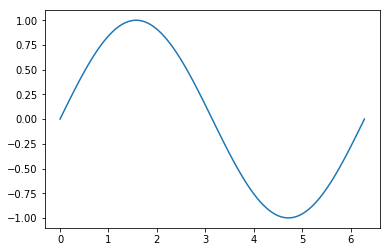

In [2]:
import matplotlib.pylab as pl
import numpy as np

x = np.linspace(0,2*np.pi, 100)
data = np.sin(x)

pl.plot(x,data)

Jupyter notebooks are a little bit different than typical Python scripts in that no display function is needed. If you're writing a script or working in iPython on your computer, you'll also have to run the following command to see your plot:

    pl.show()
    
## Overplotting Multiple Data Sets in One Plot

What else can we do? Let's try overplotting another stream of data on top of the original.

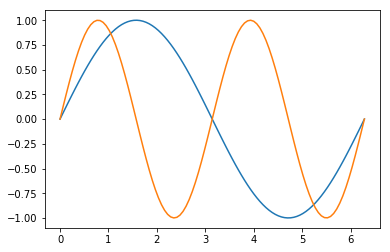

In [4]:
data2 = np.sin(2*x)

pl.plot(x,data)
pl.plot(x,data2)

## Subplots

It's also fairly common to want to show two or more related plots simultaneously. For example, radio astronomers often want to know about the amplitude and phase of a data set. This makes it convenient to be able to group plots together, which is where subplotting comes in.

Let's take a look at how this works. For this example, we're going to take a short impulse in the time domain and Fourier transform it to look at its amplitude and phase characteristics in the frequency domain.

Ok.


[-5.0, 4.9500000000000002, -3.2, 3.2]

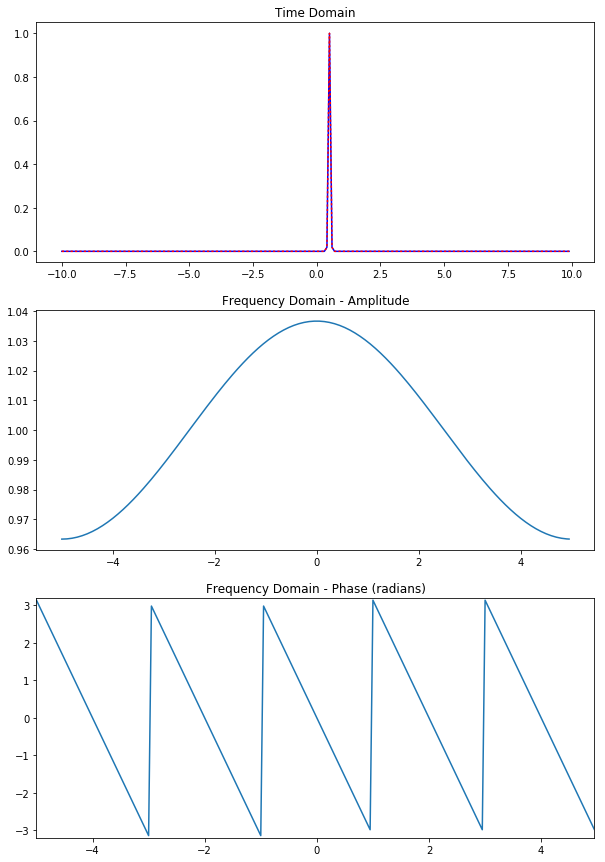

In [37]:
t_bin = 0.1 # seconds
t_int = 20.0 # seconds

time = np.arange(-t_int/2.,t_int/2.,t_bin)
freqs = np.fft.fftshift(np.fft.fftfreq(len(time),t_bin))

# impulse width
s = 0.05

### source delay (in seconds)
### move this around 0.0, 0.1, 0.2, etc and see what happens to the phase
tau = 0.5

# data
data = np.exp ( -1 * (time-tau)**2 / (s*s) )

# FT of data
fdata = np.fft.fftshift( np.fft.fft( np.fft.ifftshift( data ) ) )

# Inverse FT
# Should be identical to data
ifdata = np.fft.fftshift( np.fft.ifft( np.fft.ifftshift( fdata ) ) )
if np.all(np.abs(ifdata-data) < 1.e-8) == True:
    print "Ok."
else:
    print "Oh no."

# Plot everything...

fig = pl.figure(figsize=(10,15)) # instantiate figure object and set its size

ax1 = fig.add_subplot(311)
ax1.set(title="Time Domain")
ax1.plot(time,data,'b-')
ax1.plot(time,ifdata.real,'r:')

ax2 = fig.add_subplot(312)
ax2.set(title="Frequency Domain - Amplitude")
ax2.plot(freqs, np.abs(fdata) )

ax3 = fig.add_subplot(313)
ax3.set(title="Frequency Domain - Phase (radians)")
ax3.plot(freqs, np.arctan2( fdata.imag, fdata.real ) )
ax3.axis( [ np.min(freqs), np.max(freqs), -3.2, 3.2] )

--> export plots to various file formats, pros and cons
--> how to properly label plots
--> color & aesthetics